In [27]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from random import random

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 30,10

In [28]:
inputCSV = '../datasets/prepared/parking-prepared.csv';
data = pd.read_csv(inputCSV)

data['spots_available'] = pd.to_numeric(data['spots_available'])
data['verification_datetime'] = pd.to_datetime(data['verification_datetime'])

# Defines the frequency (by creating a new index that was not in the index).
data = data.set_index('verification_datetime').asfreq('15min')
data.index = pd.DatetimeIndex(data.index, freq=data.index.inferred_freq)

# Validate all new NaN values to the most recent valid value
for i in range(0,len(data)):
    if np. isnan(data.iloc[i]['spots_available']):
        data.iloc[i]['spots_available'] = data.iloc[i-1]['spots_available']

data = data.dropna()
print("Done!")

Done!


In [29]:
predict_days = 90

model = ARIMA(data, order=(1, 1, 1), freq='15min')
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(start=len(data), end=len(data)+predict_days*96, typ='levels', dynamic=True)

print("Predict Parking Spots Available for Next 90 Days:")
print(yhat)

print("\nMin Value:",yhat.min())
print("Max Value:",yhat.max())

print("\nDone!")

Predict Parking Spots Available for Next 90 Days:
2017-04-22 00:00:00     895.685131
2017-04-22 00:15:00     944.730411
2017-04-22 00:30:00     990.386283
2017-04-22 00:45:00    1032.885956
2017-04-22 01:00:00    1072.446595
                          ...     
2017-07-20 23:00:00    -248.868061
2017-07-20 23:15:00    -249.083496
2017-07-20 23:30:00    -249.298931
2017-07-20 23:45:00    -249.514365
2017-07-21 00:00:00    -249.729800
Freq: 15T, Length: 8641, dtype: float64

Min Value: -249.72980025566198
Max Value: 1592.0801649850239

Done!


In [30]:
predict = pd.date_range(start='2017-04-22', end='2017-07-21', freq="15min")

final = pd.DataFrame(data=predict, columns=['verification_datetime'])
final['spots_available'] = yhat.tolist()

final['0'] = pd.to_datetime(final['verification_datetime'])
final = final.set_index('verification_datetime').asfreq('15min')
final.index = pd.DatetimeIndex(final.index, freq=final.index.inferred_freq)

final = final.drop(final.columns[1], axis=1)

print("Done.")

Done.


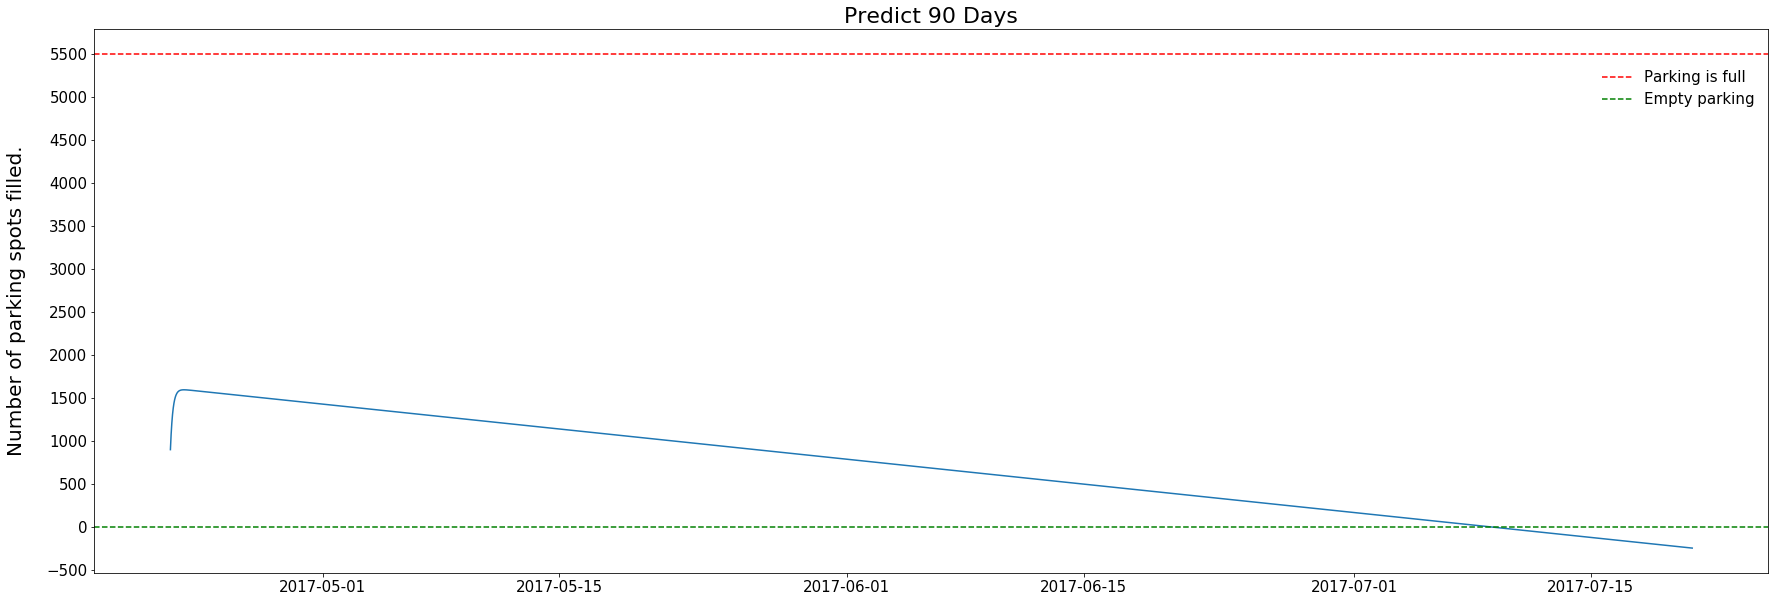

In [31]:
# Filter the dataset from the range of time with the minimun noise
prepared_data = final.copy()

#prepared_data = prepared_data[(prepared_data.index.to_series().dt.day >= 3) | (prepared_data.index.to_series().dt.month != 6)]

plt.tick_params(axis='both', which='major',  labelsize=15)
plt.ylabel('Number of parking spots filled.', labelpad=20,  fontsize=20)

#plt.plot(y=5500, color='r', linestyle='dashed')

plt.plot(prepared_data)
plt.title("Predict 90 Days", fontSize=22)
plt.locator_params(axis='y', nbins=21)
plt.axhline(y=5500, color='r', linestyle='--', label="Parking is full")
plt.axhline(y=0, color='g', linestyle='--', label="Empty parking")
plt.legend(loc='upper right', frameon=False, bbox_to_anchor=(1, 0.95), prop={'size': 15})